# 3.4 有监督学习

无论采用何种有监督学习算法，基本上操作流程是相同的，大致可分为三步：

1.	**实例化**。即针对采用的算法进行实例化，也就是定义评估模型对象。

2.	**训练**。即调用模型接口在训练数据上训练模型，也就是进行数据拟合，训练模型，确定对象的内置参数。各种算法都提供了统一的fit函数接口进行训练。

3.	**测试**。训练完成后，模型对象的内置参数就确定了，然后就可以通过这个模型对象对新数据进行预测。通常算法都提供了统一的predict函数接口进行预测。

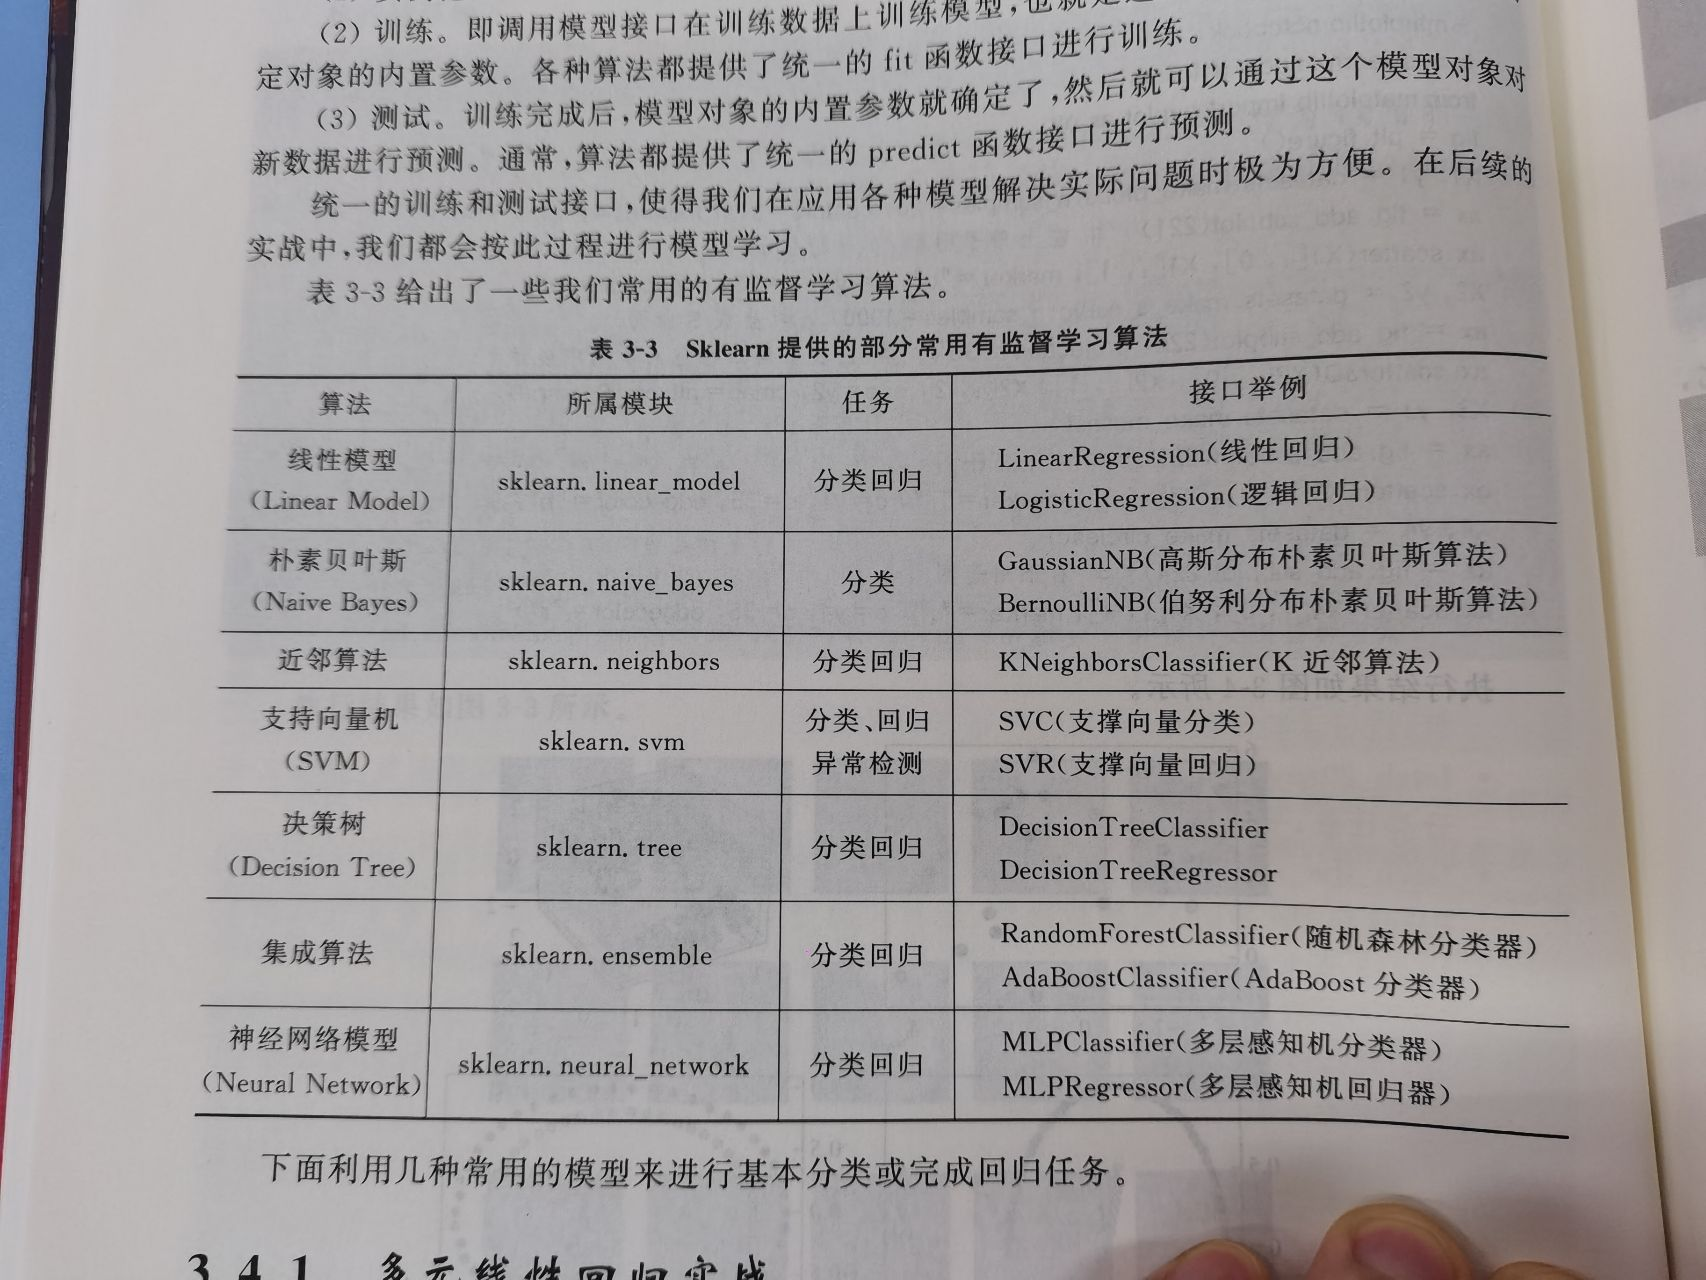

## 3.4.1 多元线性回归实战
$$ \hat{y}(w,x)=w_{0}+w_{1} x_{1}+w_{2} x_{2}+...+w_{n} x_{n} $$

下面以加利福尼亚房价预测任务为例

（1）加载数据集

In [2]:
import sklearn
from sklearn import datasets

house = datasets.fetch_california_housing()
dir(house)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

### 加载数据集

In [3]:
X,y = house.data, house.target # 查看data数据和target数据
# 大写通常代表矩阵 小写是向量
print(X.shape, y.shape)  # 显示特征数组形状和标签数组形状
print(X[:5], y[:5])  # 显示前5个样本特征和标签

(20640, 8) (20640,)
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]] [4.526 3.585 3.521 3.413 3.422]


### 数据预处理

In [4]:
from sklearn.preprocessing import StandardScaler as SS # 数据归一化
from sklearn.model_selection import train_test_split  # 用于数据集划分
X_std = SS().fit_transform(X)# 数据预处理-标准化操作

# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1)

### 回归建模
Sklearn在进行有监督学习时，无论采用何种算法，其建模过程基本都是按照“实例化、训练、测试”三步进行的。

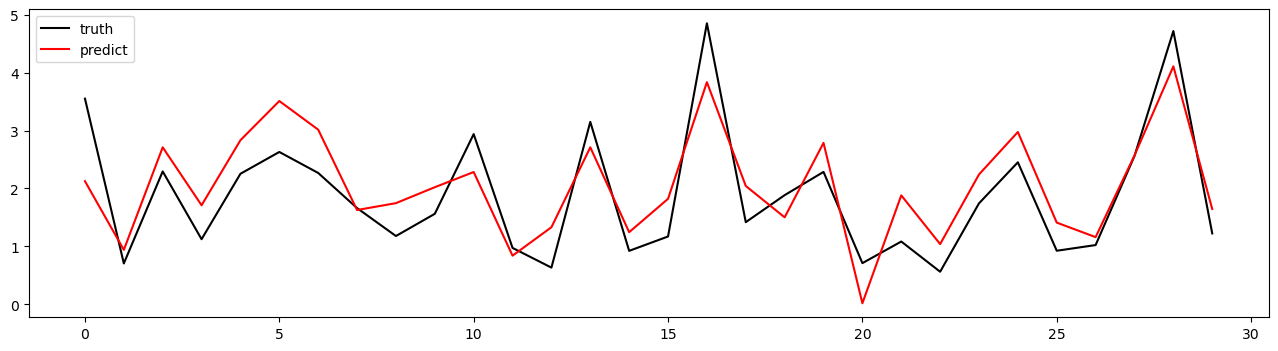

In [7]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# 实例化 定义一个线性回归器
LR_regr = LinearRegression()

# 训练
LR_regr.fit(X_train, y_train)
# 测试
y_predict = LR_regr.predict(X_test)

# 对比预测结果和真实值(Grand_truth)，对前30个测试结果可视化
plt.figure(figsize=(16,4))
plt.plot(range(30), y_test[:30],  color='black', label="truth")
plt.plot(range(30), y_predict[:30], color='red', label="predict")
plt.legend()


### 模型评估
Sklearn的metrics模块提供了大量常见的模型评估方法。

均方误差公式如下所示：

$$mse(y, \hat{y})=\frac{1}{n} ∑_{i=0}^{n-1}(y_{i}-\hat{y_{i}} )^2 $$

R2分数公式如下所示：

$$R^2 (y, \hat{y})=1 - \frac{∑_{i=0}^{n-1}(y_{i}-\hat{y_{i}} )^2 )}{∑_{i=0}^{n-1}(y_{i}-\bar{y})^2 }$$

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predict)
r_2 = r2_score(y_test, y_predict)

print('Mean squared error: %.3f'%(mse))
print('Coefficient of determination: %.3f'%(r_2))

Mean squared error: 0.530
Coefficient of determination: 0.597


Sklearn中的各种有监督算法也提供了score接口

In [9]:
score = LR_regr.score(X_test, y_test)  # 测试集的特征和标签作为参数
print('%.3f'%(score))

0.597


### 模型持久化

我们训练好的模型需要部署到其他环境，直接进行预测任务，通常是将其保存到文件中

最简单的模型持久化方法是使用基于python的joblib工具包

In [10]:
from joblib import dump
dump(LR_regr,'house_model.joblib') # 模型持久化

['house_model.joblib']

以上代码将前面训练好的模型LR_regr存储到当面目录下的house_model.joblib文件中，该文件可被复制到其他环境，直接用于预测任务。

In [11]:
from joblib import load
model = load('house_model.joblib') # 加载训练好的模型
y_pred = model.predict(X_test) # 进行预测

下面我们采用拟合能力更强的随机森林算法进行训练，并比较两个模型的性能。

随机森林算法属于集成学习方式，所谓集成学习，是指使用多个学习算法构建的模型进行综合预测，以提高单个模型的泛化性和鲁棒性。

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate
RF_regr = RandomForestRegressor(n_estimators=50, random_state=1)

# Train
RF_regr.fit(X_train, y_train)

# Predict 
RF_y_preds = RF_regr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, RF_y_preds)
r_2 =r2_score(y_test, RF_y_preds)

print('Mean squared error: %.3f'%(mse))
print('Coefficient of determination: %.3f'%(r_2))


Mean squared error: 0.266
Coefficient of determination: 0.798


## 逻辑回归实战

分类

测试与算法评估方法与线性回归基本相同，只不过在对模型进行评价时，其预测结果与真实值不同，则结果就是预测错误

算平均正确率（Mean Accuracy）评价指标，而不再是R2分数，其计算公式如下：
 
$$Mean-Acc=\frac{1}{c} ∑_{i=0}^{c-1}\frac{m_{i}}{n_{i}}$$ 



下面将以乳腺癌分类诊断任务为例

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Datasets
data = load_breast_cancer()
X,y = data.data, data.target

# Norm
X = StandardScaler().fit_transform(X)

# split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# instantiate
logistic_clf = LogisticRegression()

# Train
logistic_clf.fit(X_train, y_train)

# evaluate
acc = logistic_clf.score(X_test, y_test)
print("The accuracy is %.3f" % acc)  # 打印平均正确率

# Predict
y_predict = logistic_clf.predict(X_test)
print(y_predict[:5], y_test[:5]) 

The accuracy is 0.971
[1 0 1 0 0] [1 0 1 0 0]


平均正确率评价指标针对的是所有类别的指标，我们也可以分析各个类别的精确率（Precision）、召回率（Recall）和F1值（F1-score）等性能指标，各指标计算公式如下：

$$Precision(c_{i})=\frac{m_{i}}{m_{i}+o_{i} }$$

$$Recall(c_{i})=\frac{m_{i}}{n_{i}}$$ 

$$F1-score(c_{i})=\frac{2Precision(c_{i})Recall(c_{i})}{Precision(c_{i})+Recall(c_{i})}$$

上述公式中，ci表示第i个类别，ni表示第i类样本的总数，mi表示第i类样本中预测正确的数目，oi表示其他类样本被错误识别为第i类的样本数目。

借助metrics模块的classification_report函数，可以直接得到各类别的性能指标，或借助confusion_matrix函数，得到预测结果的混淆矩阵。执行代码如下：


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(f"{classification_report(y_test, y_predict)}")
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 61   2]
 [  3 105]]


不同的随机切分结果得到的训练集和测试集是不同的，从而导致准确率也会不同。为了解决这个问题，人们多采用交叉验证（Cross-validation）方式来评估算法性能。

In [16]:
from sklearn.model_selection import cross_val_score
# Datasets
data = load_breast_cancer()

# data & target
X,y = data.data, data.target

# Norm
X = StandardScaler().fit_transform(X)

# Instantiate
logistic_clf = LogisticRegression()

# Score, 分为5份，进行5次验证
scores = cross_val_score(logistic_clf, X, y, cv=5)
print(scores, '\n%0.2f accuracy with std %0.2f'%(scores.mean(), scores.std()))

[0.98245614 0.98245614 0.97368421 0.97368421 0.99115044] 
0.98 accuracy with std 0.01


cross_val_score函数可通过scoring参数设置不同的性能指标，如'precision_macro'、'recall_macro'或'f1_macro'，分别表示模型的精确率、召回率和F1值，它们都是逻辑回归模型常用的性能评价指标。示例如下：

In [17]:
scores = cross_val_score(logistic_clf, X, y, cv=5, scoring='precision_macro')
print(scores, '\n%0.2f precision with std %0.2f'%(scores.mean(), scores.std()))

[0.98132984 0.98630137 0.98       0.97410625 0.98837209] 
0.98 precision with std 0.01


In [18]:
from sklearn.model_selection import cross_validate
scoring=['precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(logistic_clf, X, y, cv=5, scoring=scoring)
print(scores)

{'fit_time': array([0.00522518, 0.00851917, 0.00606227, 0.00600624, 0.00651813]), 'score_time': array([0.00712132, 0.00599718, 0.00657868, 0.00500083, 0.00400138]), 'test_precision_macro': array([0.98132984, 0.98630137, 0.98      , 0.97410625, 0.98837209]), 'test_recall_macro': array([0.98132984, 0.97674419, 0.96428571, 0.96924603, 0.99295775]), 'test_f1_macro': array([0.98132984, 0.98115079, 0.9712774 , 0.97158288, 0.99057155])}
